In [ ]:
##sorry, it's not really finished, i got confused with it and tried to work on it, which made thigns even worse..

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
#getting data & first exploration

In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [4]:
query1 = '''select r.rental_id as Rental_ID, count(r.rental_id) as times_rented, r.Inventory_id as INV_ID, r.Customer_id, i.film_id, i.store_id, c.category_id, c.name, f.rental_duration, f.release_year, f.rating, f.special_features from rental as r
join inventory as i on i.inventory_id=r.inventory_id
join film_category as fc on fc.film_id=i.film_id
join category as c on c.category_id =fc.category_id
join film as f on f.film_id = fc.film_id
where rental_date >= 20050730 and rental_date <= 20050830
group by i.film_id
Order by times_rented ASC;'''

df= pd.read_sql_query(query1, engine)
df.head()

,Rental_ID,times_rented,INV_ID,Customer_id,film_id,store_id,category_id,name,rental_duration,release_year,rating,special_features
0,14625,1,2661,507,584,1,9,Foreign,6,2006,PG-13,Behind the Scenes
1,14009,2,3004,382,659,2,1,Action,3,2006,PG-13,"Trailers,Deleted Scenes"
2,13535,2,1563,86,343,1,3,Children,6,2006,PG,"Trailers,Deleted Scenes"
3,11673,2,823,303,180,2,4,Classics,4,2006,PG-13,"Trailers,Commentaries"
4,12318,2,3694,332,808,2,4,Classics,5,2006,R,Behind the Scenes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rental_ID         958 non-null    int64 
 1   times_rented      958 non-null    int64 
 2   INV_ID            958 non-null    int64 
 3   Customer_id       958 non-null    int64 
 4   film_id           958 non-null    int64 
 5   store_id          958 non-null    int64 
 6   category_id       958 non-null    int64 
 7   name              958 non-null    object
 8   rental_duration   958 non-null    int64 
 9   release_year      958 non-null    int64 
 10  rating            958 non-null    object
 11  special_features  958 non-null    object
dtypes: int64(9), object(3)
memory usage: 89.9+ KB


In [6]:
df.shape

(958, 12)

In [7]:
df.isna().sum()

Rental_ID           0
times_rented        0
INV_ID              0
Customer_id         0
film_id             0
store_id            0
category_id         0
name                0
rental_duration     0
release_year        0
rating              0
special_features    0
dtype: int64

In [8]:
df.dropna(how='all')

,Rental_ID,times_rented,INV_ID,Customer_id,film_id,store_id,category_id,name,rental_duration,release_year,rating,special_features
0,14625,1,2661,507,584,1,9,Foreign,6,2006,PG-13,Behind the Scenes
1,14009,2,3004,382,659,2,1,Action,3,2006,PG-13,"Trailers,Deleted Scenes"
2,13535,2,1563,86,343,1,3,Children,6,2006,PG,"Trailers,Deleted Scenes"
3,11673,2,823,303,180,2,4,Classics,4,2006,PG-13,"Trailers,Commentaries"
4,12318,2,3694,332,808,2,4,Classics,5,2006,R,Behind the Scenes
...,...,...,...,...,...,...,...,...,...,...,...,...
953,8906,15,2667,560,586,1,1,Action,4,2006,PG,Behind the Scenes
954,10794,15,889,27,199,1,6,Documentary,4,2006,R,Behind the Scenes
955,10699,15,1029,125,231,1,8,Family,7,2006,R,"Trailers,Behind the Scenes"
956,13703,15,2296,356,500,1,9,Foreign,5,2006,PG-13,"Trailers,Commentaries,Behind the Scenes"


In [9]:
df['Rental_ID'].unique()

array([14625, 14009, 13535, 11673, 12318,  9509, 15883, 12450, 15588,
       15696, 13154, 10477, 14432, 15381, 11826, 11607, 14271, 15285,
       10197, 13175, 15551, 13934, 13181, 16008, 11037, 15264, 12766,
       15053, 12982, 15658,  9706,  9737,  9927, 15636, 14609, 15250,
       10872,  9677,  9219, 14144, 10140, 14918, 12773,  8914,  9962,
        8876, 15241,  9714, 11169, 10268, 11653, 12622, 14222, 11032,
        9398, 10142, 10610, 10930,  9802,  9146, 10275, 11441, 14359,
        9805,  9261, 15585, 11868,  9101, 13988, 10801, 15087, 11192,
       12652, 14363,  9554,  9662, 12120, 13687, 10630, 12701, 15810,
        9371, 10742, 13879, 11480, 15098,  9072,  9282, 11752, 11399,
       14087, 10161, 12553,  9732, 12331, 15530, 11788, 14254,  9185,
       12180,  8918, 10995, 12818, 11171,  9090, 10322, 10067, 10936,
       11314,  9708, 12962, 13245, 12172,  9957,  9314, 11385, 11562,
       10467, 10522,  9022, 13047,  9969, 11435, 11634,  9896, 10366,
       14412,  9640,

In [10]:
df['release_year'].unique()

array([2006], dtype=int64)

In [11]:
df = df.drop('release_year', axis=1)
df.head()

,Rental_ID,times_rented,INV_ID,Customer_id,film_id,store_id,category_id,name,rental_duration,rating,special_features
0,14625,1,2661,507,584,1,9,Foreign,6,PG-13,Behind the Scenes
1,14009,2,3004,382,659,2,1,Action,3,PG-13,"Trailers,Deleted Scenes"
2,13535,2,1563,86,343,1,3,Children,6,PG,"Trailers,Deleted Scenes"
3,11673,2,823,303,180,2,4,Classics,4,PG-13,"Trailers,Commentaries"
4,12318,2,3694,332,808,2,4,Classics,5,R,Behind the Scenes


In [12]:
df['times_rented'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [13]:
query2='''select r.customer_id as CT , count(i.film_id) as Movies_rented  from rental as r
join inventory as i on i.inventory_id=r.inventory_id
join film_category as fc on fc.film_id=i.film_id
join category as c on c.category_id =fc.category_id
join film as f on f.film_id = fc.film_id
where r.rental_date >= 20050730 and r.rental_date <= 20050830
group by Customer_id
Order by Movies_rented ASC;'''

df2= pd.read_sql_query(query2, engine)
df2.head()

,CT,Movies_rented
0,318,2
1,281,2
2,164,2
3,228,4
4,222,4


In [14]:
df2['Movies_rented'].unique()

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23], dtype=int64)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CT             599 non-null    int64
 1   Movies_rented  599 non-null    int64
dtypes: int64(2)
memory usage: 9.5 KB


In [16]:
df2.isna().sum()

CT               0
Movies_rented    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rental_ID         958 non-null    int64 
 1   times_rented      958 non-null    int64 
 2   INV_ID            958 non-null    int64 
 3   Customer_id       958 non-null    int64 
 4   film_id           958 non-null    int64 
 5   store_id          958 non-null    int64 
 6   category_id       958 non-null    int64 
 7   name              958 non-null    object
 8   rental_duration   958 non-null    int64 
 9   rating            958 non-null    object
 10  special_features  958 non-null    object
dtypes: int64(8), object(3)
memory usage: 82.5+ KB


In [18]:
df['name'].value_counts()

Sports         73
Family         67
Foreign        67
Animation      64
Documentary    63
Drama          61
Action         61
New            60
Sci-Fi         59
Children       58
Games          58
Comedy         56
Classics       54
Horror         53
Travel         53
Music          51
Name: name, dtype: int64

In [19]:
df['rating'].value_counts()

PG-13    213
NC-17    202
R        189
PG       183
G        171
Name: rating, dtype: int64

In [20]:
df['special_features'].value_counts()

Trailers,Commentaries,Behind the Scenes                   76
Trailers                                                  71
Commentaries,Behind the Scenes                            70
Behind the Scenes                                         68
Deleted Scenes,Behind the Scenes                          68
Trailers,Behind the Scenes                                67
Trailers,Commentaries                                     67
Trailers,Deleted Scenes                                   65
Commentaries,Deleted Scenes,Behind the Scenes             65
Commentaries,Deleted Scenes                               62
Commentaries                                              61
Trailers,Commentaries,Deleted Scenes                      60
Deleted Scenes                                            57
Trailers,Commentaries,Deleted Scenes,Behind the Scenes    55
Trailers,Deleted Scenes,Behind the Scenes                 46
Name: special_features, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df.describe()

,Rental_ID,times_rented,INV_ID,Customer_id,film_id,store_id,category_id,rental_duration
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,11639.289144,7.305846,2296.724426,290.521921,502.598121,1.207724,8.483299,4.969729
std,1989.710858,2.995885,1317.854373,175.491259,287.541738,0.405890,4.615321,1.407593
min,8869.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,10061.000000,5.000000,1159.750000,138.000000,256.250000,1.000000,5.000000,4.000000
50%,11137.500000,7.000000,2322.000000,278.500000,504.500000,1.000000,8.000000,5.000000
75%,13150.750000,10.000000,3427.500000,442.000000,751.750000,1.000000,13.000000,6.000000
max,16044.000000,15.000000,4574.000000,599.000000,1000.000000,2.000000,16.000000,7.000000


In [23]:
special_features = df['special_features'].value_counts()

C:\Users\zdepptana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


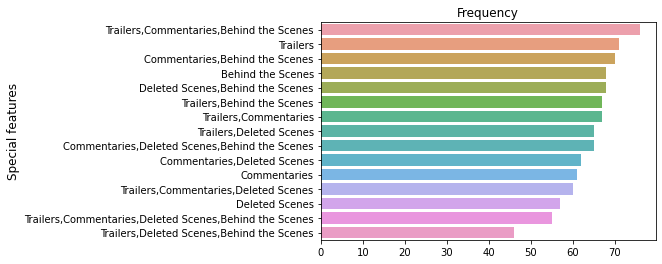

In [24]:
sns.barplot( special_features.values, special_features.index, alpha=0.9)
plt.title('Frequency')
plt.ylabel('Special features', fontsize=12)
plt.show()

In [25]:
rating_fr = df['rating'].value_counts()

C:\Users\zdepptana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


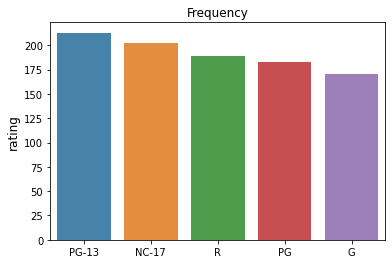

In [26]:
sns.barplot( rating_fr.index, rating_fr.values,alpha=0.9)
plt.title('Frequency')
plt.ylabel('rating', fontsize=12)
plt.show()

In [27]:
name_fr = df['name'].value_counts()

C:\Users\zdepptana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


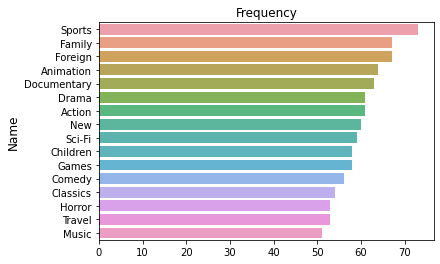

In [28]:
sns.barplot(name_fr.values, name_fr.index ,alpha=0.9)
plt.title('Frequency')
plt.ylabel('Name', fontsize=12)
plt.show()

In [29]:
replace_rating = {'G':1, 'PG':2, 'PG-13':3, 'R':4, 'NC-17':5}
df['rating'] = df['rating'].map(replace_rating)

In [30]:
df.head()

,Rental_ID,times_rented,INV_ID,Customer_id,film_id,store_id,category_id,name,rental_duration,rating,special_features
0,14625,1,2661,507,584,1,9,Foreign,6,3,Behind the Scenes
1,14009,2,3004,382,659,2,1,Action,3,3,"Trailers,Deleted Scenes"
2,13535,2,1563,86,343,1,3,Children,6,2,"Trailers,Deleted Scenes"
3,11673,2,823,303,180,2,4,Classics,4,3,"Trailers,Commentaries"
4,12318,2,3694,332,808,2,4,Classics,5,4,Behind the Scenes


In [31]:
df = df.drop('special_features', axis=1)
df.head()

,Rental_ID,times_rented,INV_ID,Customer_id,film_id,store_id,category_id,name,rental_duration,rating
0,14625,1,2661,507,584,1,9,Foreign,6,3
1,14009,2,3004,382,659,2,1,Action,3,3
2,13535,2,1563,86,343,1,3,Children,6,2
3,11673,2,823,303,180,2,4,Classics,4,3
4,12318,2,3694,332,808,2,4,Classics,5,4


In [32]:
df = df.drop('name', axis=1)
df.head()

,Rental_ID,times_rented,INV_ID,Customer_id,film_id,store_id,category_id,rental_duration,rating
0,14625,1,2661,507,584,1,9,6,3
1,14009,2,3004,382,659,2,1,3,3
2,13535,2,1563,86,343,1,3,6,2
3,11673,2,823,303,180,2,4,4,3
4,12318,2,3694,332,808,2,4,5,4


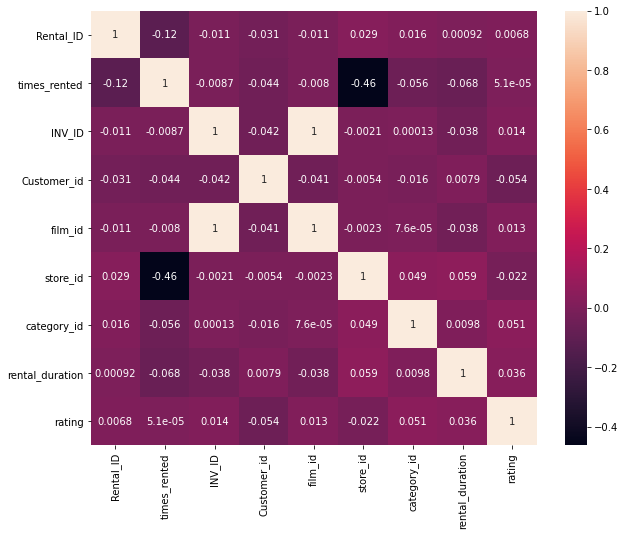

In [33]:
# Checking for correlation 

corr_matrix = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [34]:
y = df['times_rented']
x = df.drop(['times_rented'], axis = 1)

In [35]:
x.head()

,Rental_ID,INV_ID,Customer_id,film_id,store_id,category_id,rental_duration,rating
0,14625,2661,507,584,1,9,6,3
1,14009,3004,382,659,2,1,3,3
2,13535,1563,86,343,1,3,6,2
3,11673,823,303,180,2,4,4,3
4,12318,3694,332,808,2,4,5,4


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaled_x = StandardScaler().fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [49]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(scaled_x, y)

In [51]:
prediction = classification.predict(x_test)
classification.score(scaled_x, y)

0.18162839248434237

In [55]:
from sklearn.metrics import confusion_matrix
y_pred = classification.predict(scaled_x)
confusion_matrix(prediction, y_test)

array([[11, 40, 39, 42, 36, 48, 41, 47, 31, 23, 13, 10,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int64)